In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import pyodbc as odbc

In [3]:
cnxn = odbc.connect('Driver={SQL Server};'
                    'Server=DESKTOP-S40OV4H;'
                    'Database=Sum_capstone_proj;'
                    'Trusted_Connection=yes;')

In [4]:
#Importing the dataset, read straight from SQL
dataset=pd.read_sql_query('SELECT * FROM diamonds_shuf69sclnzparm_50k', cnxn)
dataset.head(10)

,depth_scaled,table_scaled,cut_scaled,color_scaled,clarity_scaled,carat_scaled,price_USD,index_org
0,0.733344,-0.204605,0.981473,0.937163,-0.638095,-0.291008,1901.0,47803.0
1,0.105120,-0.652139,0.981473,1.525021,1.183265,0.552862,13588.0,25068.0
2,0.942753,0.242928,-1.705279,0.937163,0.576145,-0.122234,2824.0,518.0
3,1.570978,-1.994739,-1.705279,-1.414272,0.576145,0.426281,3763.0,5135.0
4,-0.523105,1.137995,0.085889,-0.826413,-0.638095,1.481118,9820.0,21753.0
5,0.384331,1.137995,-0.809695,-0.826413,-1.245215,1.227957,6369.0,15929.0
6,-0.872119,-0.652139,0.981473,0.937163,-0.030975,-1.029394,872.0,34634.0
7,-1.919161,0.242928,-1.705279,1.525021,-1.245215,0.257507,3936.0,5914.0
8,-0.383500,0.690462,-0.809695,-0.238555,1.790385,-1.008297,876.0,34730.0
9,-0.174092,1.585529,-1.705279,1.525021,-1.245215,1.502215,8742.0,20344.0


In [6]:
#Defining X and y
X=dataset.iloc[:,0:6].values
y=dataset.iloc[:,-2].values

In [7]:
X

array([[ 0.73334442, -0.20460509,  0.98147332,  0.93716275, -0.63809506,
        -0.29100792],
       [ 0.10511955, -0.65213854,  0.98147332,  1.52502147,  1.18326497,
         0.55286174],
       [ 0.94275271,  0.24292836, -1.70527938,  0.93716275,  0.57614496,
        -0.12223399],
       ...,
       [ 0.73334442, -1.09967199, -0.80969515, -0.23855468,  1.79038498,
        -1.05049061],
       [ 3.38584943,  0.24292836, -2.60086361,  0.34930404, -1.24521508,
         0.46847477],
       [ 0.10511955, -0.20460509,  0.98147332, -0.23855468,  1.79038498,
        -0.48087859]])

In [8]:
y

array([ 1901., 13588.,  2824., ...,   635.,  3633.,  2217.])

In [9]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=  train_test_split(X,y,test_size=0.2, random_state=42)

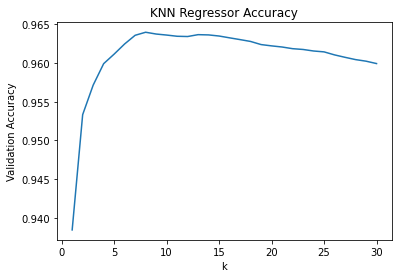

Max r2 score occur at K = 8
Max r2 score = 0.9639427322092892


In [10]:
accuracies = []

for k in range(1,31):
    from sklearn.neighbors import KNeighborsRegressor
    regressor=KNeighborsRegressor(n_neighbors=k, weights='distance')
    regressor.fit(X_train,y_train)
    accuracies.append(regressor.score(X_test, y_test))

k_list = range(1,31)

plt.plot(k_list, accuracies)
plt.title("KNN Regressor Accuracy")
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()

max_value=max(accuracies)
max_n=accuracies.index(max_value)+1
print("Max r2 score occur at K = {:.0f}".format(max_n))
print("Max r2 score = {:.16f}".format(max(accuracies)))

In [11]:
#Training the KNN Model
import time
start = time.time()
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=8, weights='distance') #default is n_neighbors=5 & uniform
regressor.fit(X_train,y_train)
train_time = time.time() - start

In [12]:
train_time

0.07869076728820801

In [13]:
import time
start = time.time()
y_pred=regressor.predict(X_test)
y_pred10k_time = time.time() - start
y_pred

array([3073.63950123,  643.36095307, 2019.27455575, ...,  930.56286673,
       4672.        ,  737.26347319])

In [14]:
y_test

array([2927.,  610., 2220., ...,  899., 4588.,  825.])

In [15]:
y_pred=regressor.predict(X_test)
y_pred

array([3073.63950123,  643.36095307, 2019.27455575, ...,  930.56286673,
       4672.        ,  737.26347319])

In [16]:
from sklearn import metrics
print("Mean squared error",metrics.mean_squared_error(y_test,y_pred))
print("Mean absolute error",metrics.mean_absolute_error(y_test,y_pred))
print("R2_Score:",metrics.r2_score(y_test,y_pred))

Mean squared error 561896.4723495577
Mean absolute error 405.2144715800928
R2_Score: 0.9639427322092892


In [17]:
y_pred10k_time

0.2906513214111328

In [18]:
regressor.score(X_train, y_train)

0.9998086787490248

In [19]:
regressor.score(X_test, y_test)

0.9639427322092892

In [20]:
trained_records = []
trained_records.append({
    'model': 'KNeighborsRegressor(n=08,weights=distance)',
    'train_time': train_time,
    'test_time': y_pred10k_time,
    'train_r2': regressor.score(X_train, y_train),
    'test_r2': regressor.score(X_test, y_test),
    'test_MSE': metrics.mean_squared_error(y_test,y_pred),
    'test_MAE': metrics.mean_absolute_error(y_test,y_pred)})
trained_records

[{'model': 'KNeighborsRegressor(n=08,weights=distance)',
  'train_time': 0.07869076728820801,
  'test_time': 0.2906513214111328,
  'train_r2': 0.9998086787490248,
  'test_r2': 0.9639427322092892,
  'test_MSE': 561896.4723495577,
  'test_MAE': 405.2144715800928}]

In [21]:
trained_records = pd.DataFrame(trained_records,columns=['model','train_time','test_time','train_r2','test_r2','test_MSE','test_MAE'])
trained_records

,model,train_time,test_time,train_r2,test_r2,test_MSE,test_MAE
0,"KNeighborsRegressor(n=08,weights=distance)",0.078691,0.290651,0.999809,0.963943,561896.47235,405.214472


In [22]:
import sys
import pyodbc as odbc

cnxn = odbc.connect('Driver={SQL Server};'
                    'Server=DESKTOP-S40OV4H;'
                    'Database=Sum_capstone_proj;'
                    'Trusted_Connection=yes;')

In [23]:
#Model must be in text format.

cursor = cnxn.cursor()
trained_insert = '''INSERT INTO ML_Parameter_Score_05oct (Model,Training_Time_40k_rows,Test_Time_10k_rows,Train_r2_score,Test_r2_score,Test_MSE,Test_MAE)
               VALUES (?,?,?,?,?,?,?)
'''
for rec in trained_records.iterrows():
    values = (
        rec[1]['model'],
        rec[1]['train_time'],
        rec[1]['test_time'],
        rec[1]['train_r2'],
        rec[1]['test_r2'],
        rec[1]['test_MSE'],
        rec[1]['test_MAE']
    )
cursor.execute(trained_insert, values)
cnxn.commit()
cursor.close()
print("Input Parameter_Score Done!")

Input Parameter_Score Done!


In [24]:
Comparison=pd.DataFrame({"Actual:":y_test,"Predicted:":y_pred})
print(Comparison.to_string())

      Actual:    Predicted:
0      2927.0   3073.639501
1       610.0    643.360953
2      2220.0   2019.274556
3      5147.0   5383.258268
4     17227.0  15414.260812
5      4739.0   5266.218329
6      1024.0   1177.098543
7      5798.0   4168.975239
8      6350.0   6250.452122
9       556.0    726.935878
10      880.0    686.000000
11     1404.0   1552.117438
12      577.0    840.505001
13      505.0    516.885156
14      844.0    840.746468
15      789.0    842.800929
16      854.0   1004.897350
17     2123.0   2236.000000
18     5488.0   5676.816238
19     2964.0   2584.896268
20      743.0    675.098152
21      789.0    958.558009
22     6028.0   5920.000000
23     1013.0    789.000000
24     1125.0   1762.588287
25     2397.0   2462.453828
26      803.0    934.352403
27     2348.0   2351.600369
28      753.0    870.796018
29     2343.0   2060.250122
30     2096.0   2190.442438
31      572.0    572.295208
32     5816.0   5818.600000
33     4257.0   4342.842808
34    16294.0  14284

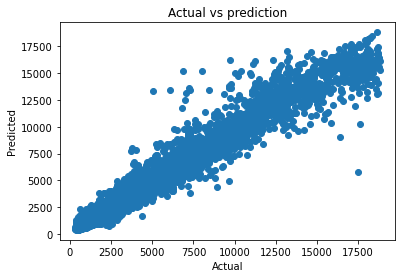

In [25]:
#Visualize
plt.scatter(y_test,y_pred)
plt.title("Actual vs prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [26]:
#Importing the dataset SET ASIDE FOR INPUT TO PREDICT, read straight from SQL
input_data=pd.read_sql_query('SELECT * FROM diamonds_shuf69sclnzparm_tail_3940', cnxn)
input_data.head(10)

,depth_scaled,table_scaled,cut_scaled,color_scaled,clarity_scaled,carat_scaled,price_USD,index_org
0,-0.243894,-0.652139,0.981473,-1.414272,2.397505,-0.987200,694.0,29200.0
1,-0.034486,-0.652139,0.981473,1.525021,1.183265,-0.607459,2718.0,53703.0
2,-0.941922,1.585529,0.085889,-0.238555,-1.245215,2.535955,17136.0,27011.0
3,-0.523105,-0.204605,0.981473,0.937163,-0.030975,-0.565266,1727.0,46017.0
4,0.454133,0.242928,-0.809695,-1.414272,-0.638095,-1.008297,388.0,41584.0
5,0.523936,-0.652139,0.981473,0.937163,-0.030975,-0.523072,2030.0,48842.0
6,-0.872119,-0.652139,0.981473,1.525021,-0.030975,-1.008297,758.0,31322.0
7,0.733344,-1.994739,0.981473,-0.238555,1.790385,-1.029394,1046.0,38798.0
8,-1.779555,1.137995,-0.809695,0.349304,-0.638095,-0.206621,2453.0,52058.0
9,-1.570147,1.137995,0.085889,0.349304,-0.030975,-1.008297,773.0,31770.0


In [27]:
#Defining X and y FROM INPUT
inp_X=input_data.iloc[:,0:6].values
inp_y=input_data.iloc[:,-2].values

In [28]:
inp_X

array([[-0.24389427, -0.65213854,  0.98147332, -1.41427211,  2.397505  ,
        -0.98720039],
       [-0.03448598, -0.65213854,  0.98147332,  1.52502147,  1.18326497,
        -0.60745904],
       [-0.94192191,  1.58552871,  0.08588908, -0.23855468, -1.24521508,
         2.53595544],
       ...,
       [ 2.12939968, -0.65213854, -2.60086361, -0.23855468,  1.18326497,
         1.48111837],
       [-2.05876612,  0.69046181,  0.08588908,  1.52502147, -1.24521508,
         0.44737803],
       [ 0.24472507, -0.65213854,  0.98147332, -2.00213083, -1.24521508,
         0.42628129]])

In [29]:
inp_y

array([  694.,  2718., 17136., ..., 13553.,  4672.,  3528.])

In [30]:
import time
start = time.time()
inpy_pred=regressor.predict(inp_X)
inpy_pred3940_time = time.time() - start
inpy_pred

array([  891.        ,  2742.        , 15076.51470936, ...,
        7006.00468067,  3960.73579785,  3465.        ])

In [31]:
print("Mean squared error",metrics.mean_squared_error(inp_y,inpy_pred))
print("Mean absolute error",metrics.mean_absolute_error(inp_y,inpy_pred))
print("R2_Score:",metrics.r2_score(inp_y,inpy_pred))

Mean squared error 635190.5553856655
Mean absolute error 438.2931143401283
R2_Score: 0.9632074006930784


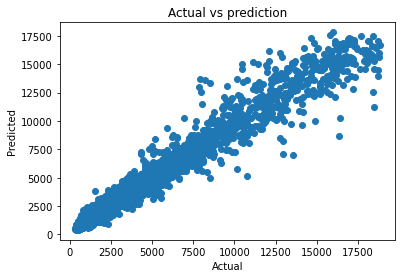

In [32]:
#Visualize
plt.scatter(inp_y,inpy_pred)
plt.title("Actual vs prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [33]:
Comparison=pd.DataFrame({"Actual:":inp_y,"Predicted:":inpy_pred})
print(Comparison.to_string()) 

      Actual:    Predicted:
0       694.0    891.000000
1      2718.0   2742.000000
2     17136.0  15076.514709
3      1727.0   1607.000000
4       388.0    650.641517
5      2030.0   1786.035624
6       758.0    972.000000
7      1046.0    981.083384
8      2453.0   2307.325204
9       773.0    602.000000
10     1289.0   1199.063980
11    13908.0  10888.176874
12      689.0    757.313000
13      814.0    817.055675
14     2646.0   3387.334128
15    12291.0  10684.548105
16     4963.0   5054.000000
17     1122.0   1427.546807
18     5350.0   3997.582944
19      770.0   1053.746822
20     7764.0   7906.000000
21     1219.0   1634.520020
22     1662.0   1851.604367
23      593.0    792.207572
24     1061.0    803.526313
25     2264.0   1707.790484
26      827.0    954.493265
27     4821.0   3680.412421
28    18741.0  15668.482570
29     8055.0   7911.000000
30     5846.0   4366.751049
31     4315.0   4779.400181
32     1046.0    995.798370
33    11365.0  11212.348867
34      696.0    852

In [34]:
regressor.score(inp_X, inp_y)

0.9632074006930784

In [35]:
inpy_pred3940_time

0.12070965766906738

ONLY KEY FOR TOP R2 SCORES

In [36]:
prediction_records = []
prediction_records.append({
    'model': 'KNeighborsRegressor(n=08,weights=distance)',
    'prediction_time': inpy_pred3940_time,
    'r2': regressor.score(inp_X, inp_y),
    'MSE': metrics.mean_squared_error(inp_y,inpy_pred),
    'MAE': metrics.mean_absolute_error(inp_y,inpy_pred)})
prediction_records

[{'model': 'KNeighborsRegressor(n=08,weights=distance)',
  'prediction_time': 0.12070965766906738,
  'r2': 0.9632074006930784,
  'MSE': 635190.5553856655,
  'MAE': 438.2931143401283}]

In [37]:
prediction_records = pd.DataFrame(prediction_records,columns=['model','prediction_time','r2','MSE','MAE'])
prediction_records

,model,prediction_time,r2,MSE,MAE
0,"KNeighborsRegressor(n=08,weights=distance)",0.12071,0.963207,635190.555386,438.293114


In [38]:
cursor = cnxn.cursor()
prediction_insert = '''INSERT INTO ML_Predictions_Score_05oct (Model,Prediction_Time_3940_rows,Prediction_r2,Prediction_MSE,Prediction_MAE)
               VALUES (?,?,?,?,?)
'''
for rec in prediction_records.iterrows():
    values = (
        rec[1]['model'],
        rec[1]['prediction_time'],
        rec[1]['r2'],
        rec[1]['MSE'],
        rec[1]['MAE']
    )
cursor.execute(prediction_insert, values)
cnxn.commit()
cursor.close()
print("Input Parameter_Score Done!")

Input Parameter_Score Done!
